# Solutore polinomiale
#### (versione con numpy)

Luca Mari, marzo 2023

Questo solutore approssima funzioni $\mathbb{R} \rightarrow \mathbb{R}$, per esempio $sin(x)$ tra $-\pi$ e $\pi$, mediante un polinomio di grado $n$, di cui stima i parametri.

In [73]:
import numpy as np
import matplotlib.pyplot as plt

Decidi la funzione -- che nella fase di test si supporrà ignota, ovviamente -- da approssimare.

In [74]:
the_fun = lambda x: np.sin(x)   # funzione da approssimare
the_min = -np.pi                # argomento minimo
the_max = np.pi                 # argomento massimo
num_pts = 1000                  # numero di argomenti in cui calcolare la funzione

x = np.linspace(the_min, the_max, num_pts)
y = the_fun(x)

Decidi il grado $n$ del polinomio, numero di ripetizioni $q$ ("epoche") dell'addestramento, e il _learning rate_.

In [75]:
n = 3                           # grado del polinomio approssimante
q = 5000                        # numero di ripetizioni ("epoche") dell'addestramento
lr = 1e-6                       # learning rate

Definisci la funzione di addestramento, che:
* inizializza i parametri $w_j$ del polinomio di grado $n$ come valori casuali da una gaussiana standard;
* per ogni $x$ del training set, calcola il valore del polinomio, $f_w(x) = y_{pred} = \sum \limits_{j=0}^n w_j x^j$;
* opzionalmente, calcola e visualizza l'errore quadratico (sse, _sum squared error_), $g_w(x) = \sum \limits_{k=1}^m (y_{pred} - y)^2$;
* propaga all'indietro l'errore, calcolando i valori della derivata della funzione composta $h_w(x) = g_w(f_w(x))$ in funzione di $w$ con la _chain rule_, $h'_w(x) = g'_w(f_w(x)) f'_w(x)$, in cui
  * $g'_w(f_w(x)) = 2 (y_{pred} - y)$ e
  * per ogni elemento $j$ del polinomio, $w_j x^j$, la sua derivata rispetto a $w_j$ è ovviamente $f'_{w_j}(x) = x^j$;
* per ogni $j$, aggiorna il parametro $w_j$ al nuovo valore $w_i - l h'_{w_j}(x)$, dove $l$ è il _learning rate_;
* ripete il processo per $q$ volte.

In [76]:
def train(x:np.ndarray, y:np.ndarray, n1:int, q:int, lr:float, log:bool=False) -> np.ndarray:
    w = np.random.standard_normal(size=n1)
    poly = np.ndarray((n1, len(x)))
    grad = np.ndarray(n1)

    if log: print('step\tmse')

    for i in range(q):
        for j in range(n1): poly[j] = np.power(x, j)         # forward pass
        y_pred = w.T @ poly

        if log:                                             # calcola e visualizza l'errore
            sse = np.square(y_pred - y).sum()
            if i % 1000 == 0: print(f'{i}\t{sse:.5f}')

        grad_y_pred = 2.0 * (y_pred - y)                    # backpropagation
        for j in range(n1): grad[j] = (grad_y_pred * np.power(x, j)).sum()

        w -= lr * grad  # aggiorna i pesi
    return w

E finalmente esegui il processo di apprendimento, e quindi calcola e visualizza il polinomio, confrontandolo con la funzione da approssimare.

step	mse
0	26872.72715
1000	266.66915
2000	44.19049
3000	10.62876
4000	5.41979


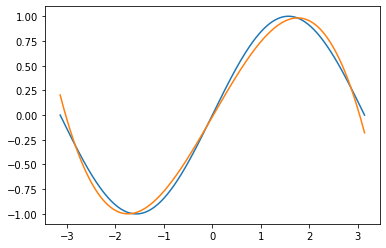

In [77]:
w = train(x, y, n+1, q, lr, True)

yy = np.zeros(num_pts)
for j in range(n+1): yy += w[j] * np.power(x, j)

plt.plot(x, y)
plt.plot(x, yy)
plt.show()